In [1]:
!pip install surprise
import pandas as pd
import numpy as np
from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.3 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633969 sha256=ea01517cd96dd076aa257125e48d8b6799a3e571257c422ca6d671f3416ad86e
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [5]:
#3a)
data = pd.read_csv('ratings_small.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [6]:
reader = Reader(line_format='user item rating timestamp',sep=',',skip_lines=1, rating_scale=(1, 5))
data = Dataset.load_from_file("ratings_small.csv",reader)

In [34]:
#PROBABILISTIC MATRIX FACTORIZATION
algorithm_svd = SVD()
pmf_results = cross_validate(algorithm_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("Probabilistic Matrix Factorization Results : ",pmf_results)
avg_mae_pmf = pmf_results['test_mae'].mean()
avg_rsme_pmf = pmf_results['test_rmse'].mean()

print(f'Average MAE of the  Probabilistic Matrix Factorization under the 5-folds cross-validation : {avg_mae_pmf}')
print(f'Average RMSE of the  Probabilistic Matrix Factorization under the 5-folds cross-validation : {avg_rsme_pmf}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9033  0.8966  0.8878  0.8951  0.8938  0.8953  0.0050  
MAE (testset)     0.6935  0.6911  0.6851  0.6862  0.6900  0.6892  0.0031  
Fit time          4.98    6.51    4.93    5.36    5.82    5.52    0.59    
Test time         0.19    0.16    0.18    0.23    0.15    0.18    0.03    
Probabilistic Matrix Factorization Results :  {'test_rmse': array([0.90333562, 0.89658617, 0.88782431, 0.89514291, 0.8937771 ]), 'test_mae': array([0.69348011, 0.69110674, 0.68509387, 0.68620748, 0.69002175]), 'fit_time': (4.984451055526733, 6.514674663543701, 4.929840564727783, 5.36169958114624, 5.8207104206085205), 'test_time': (0.1919384002685547, 0.1618187427520752, 0.18326163291931152, 0.2262418270111084, 0.1476757526397705)}
Average MAE of the  Probabilistic Matrix Factorization under the 5-folds cross-validation : 0.6891819909660157
Average RMSE of the  Prob

In [8]:
#User Based Collabirative Filtering
sim_options = {
    "user_based": True, 
}

knn = KNNWithMeans(sim_options=sim_options)
ubcf_results = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("User Based Collabirative Filtering Results : ",ubcf_results)
avg_mae_user = ubcf_results['test_mae'].mean()
avg_rsme_user = ubcf_results['test_rmse'].mean()

print(f'Average MAE of the User based Collaborative Filtering under the 5-folds cross-validation : {avg_mae_user}')
print(f'Average RMSE of the User based Collaborative Filtering under the 5-folds cross-validation : {avg_rsme_user}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9255  0.9250  0.9191  0.9018  0.9225  0.9188  0.0088  
MAE (testset)     0.7072  0.7056  0.7025  0.6938  0.7078  0.7034  0.0051  
Fit time          0.16    0.18    0.18    0.19    0.20    0.18    0.01    
Test time         1.58    1.59    1.63    1.56    1.56    1.58    0.02    
User Based Collabirative Filtering Results :  {'test_rmse': array([0.92550509, 0.92502047, 0.91912181, 0.90177436, 0.92251865]), 'test_mae': array([0.7071936 , 0.70557143, 0.70253624, 0.69376233, 0

In [9]:
#Item Based Collabirative Filtering 
sim_options = {
    "user_based": False,
}

knn = KNNWithMeans(sim_options=sim_options)
ibcf_results = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print("Item Based Collabirative Filtering Results : ",ibcf_results)
avg_mae_item = ibcf_results['test_mae'].mean()
avg_rsme_item = ibcf_results['test_rmse'].mean()

print(f'Average MAE of the Item based Collaborative Filtering under the 5-folds cross-validation : {avg_mae_item}')
print(f'Average RMSE of the Item based Collaborative Filtering under the 5-folds cross-validation : {avg_rsme_item}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9203  0.9150  0.9183  0.9036  0.9158  0.9146  0.0058  
MAE (testset)     0.7042  0.7023  0.7041  0.6915  0.7012  0.7007  0.0047  
Fit time          5.26    4.38    4.00    4.00    7.42    5.01    1.29    
Test time         7.34    6.69    7.40    8.57    6.62    7.32    0.70    
Item Based Collabirative Filtering Results :  {'test_rmse': array([0.92034336, 0.91499961, 0.91833807, 0.90362576, 0.91578251]), 'test_mae': array([0.70418042, 0.70232275, 0.7041292 , 0.69148899, 0

In [10]:
#Cosine similarity for User based Collaborative Filtering
sim_options = {'name':'cosine','user_based': True }
user_cosine = KNNWithMeans(sim_options=sim_options)
user_cosine_scores = cross_validate(user_cosine,data,measures=['RMSE', 'MAE'],cv=5,verbose=True)
print('Cosine similarity impact on User Based Collaborative Filtering : ', user_cosine_scores)
avg_mae_cosine = user_cosine_scores['test_mae'].mean()
avg_rsme_cosine = user_cosine_scores['test_rmse'].mean()
print(f'Cosine Average MAE of the User based Collaborative Filtering : {avg_mae_cosine}')
print(f'Cosine Average RMSE of the User based Collaborative Filtering : {avg_rsme_cosine}')


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9277  0.9146  0.9216  0.9238  0.9240  0.9223  0.0044  
MAE (testset)     0.7091  0.7044  0.7045  0.7089  0.7052  0.7064  0.0021  
Fit time          0.38    0.40    0.39    0.40    0.40    0.39    0.01    
Test time         1.59    1.55    1.66    1.56    1.61    1.59    0.04    
Cosine similarity impact on User Based Collaborative Filtering :  {'test_rmse': array([0.92770095, 0.91456   , 0.9215579 , 0.92377758, 0.92404355]), 'test_mae': array([0.70908899, 0.

In [33]:
#MSD similarity for User based Collaborative Filtering
sim_options = {'name':'msd','user_based': True }
user_msd = KNNWithMeans(sim_options=sim_options)
user_msd_scores = cross_validate(user_msd,data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('MSD similarity impact on User Based Collaborative Filtering : ', user_msd_scores)
avg_mae_msd = user_msd_scores['test_mae'].mean()
avg_rsme_msd = user_msd_scores['test_rmse'].mean()
print(f'MSD Average MAE of the User based Collaborative Filtering : {avg_mae_msd}')
print(f'MSD Average RMSE of the User based Collaborative Filtering : {avg_rsme_msd}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9184  0.9141  0.9197  0.9162  0.9216  0.9180  0.0026  
MAE (testset)     0.7042  0.6982  0.7054  0.7016  0.7051  0.7029  0.0027  
Fit time          0.17    0.19    0.20    0.20    0.19    0.19    0.01    
Test time         1.85    1.57    1.79    1.56    2.04    1.76    0.18    
MSD similarity impact on User Based Collaborative Filtering :  {'test_rmse': array([0.91835252, 0.91410316, 0.91965559, 0.91620171, 0.92159812]), 'test_mae': array([0.70415601, 0.69824564, 0.705415

In [12]:
#Pearson similarity for User based Collaborative Filtering
sim_options = {'name':'pearson_baseline','user_based': True }
user_pearson = KNNWithMeans(sim_options=sim_options)
user_pearson_scores = cross_validate(user_pearson,data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Pearson similarity impact on User Based Collaborative Filtering : ', user_pearson_scores)
avg_mae_pb = user_pearson_scores['test_mae'].mean()
avg_rsme_pb = user_pearson_scores['test_rmse'].mean()
print(f'Pearson Average MAE of the User based Collaborative Filtering : {avg_mae_pb}')
print(f'Pearson Average RMSE of the User based Collaborative Filtering : {avg_rsme_pb}')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9211  0.9261  0.9213  0.9181  0.9322  0.9237  0.0050  
MAE (testset)     0.7001  0.7050  0.6996  0.6962  0.7078  0.7018  0.0041  
Fit time          0.71    0.74    0.77    0.78    0.88    0.78    0.06    
Test time         1.59    2.07    1.46    2.21    1.

In [13]:
#Cosine similarity for Item based Collaborative Filtering
sim_options = {'name':'cosine','user_based': False }
item_cosine = KNNWithMeans(sim_options=sim_options)
item_cosine_scores = cross_validate(item_cosine,data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Cosine similarity impact on Item Based Collaborative Filtering : ', item_cosine_scores)
avg_mae_cosine = item_cosine_scores['test_mae'].mean()
avg_rsme_cosine = item_cosine_scores['test_rmse'].mean()
print(f'Cosine Average MAE of the Item based Collaborative Filtering : {avg_mae_cosine}')
print(f'Cosine Average RMSE of the Item based Collaborative Filtering : {avg_rsme_cosine}')

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9231  0.9179  0.9326  0.9366  0.9266  0.9273  0.0067  
MAE (testset)     0.7092  0.7031  0.7149  0.7199  0.7078  0.7110  0.0058  
Fit time          13.09   12.79   13.20   13.38   14.14   13.32   0.45    
Test time         6.51    7.39    6.64    6.77    7.55    6.97    0.42    
Cosine similarity impact on Item Based Collaborative Filtering :  {'test_rmse': array([0.92310535, 0.91785045, 0.93262631, 0.93658438, 0.92656337]), 'test_mae': array([0.70918351, 0.

In [14]:
#MSD similarity for Item based Collaborative Filtering
sim_options = {'name':'msd','user_based': False }
item_msd = KNNWithMeans(sim_options=sim_options)
item_msd_scores = cross_validate(item_msd,data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('MSD similarity impact on Item Based Collaborative Filtering : ', item_msd_scores)
avg_mae_msd = item_msd_scores['test_mae'].mean()
avg_rsme_msd = item_msd_scores['test_rmse'].mean()
print(f'MSD Average MAE of the Item based Collaborative Filtering : {avg_mae_msd}')
print(f'MSD Average RMSE of the Item based Collaborative Filtering : {avg_rsme_msd}')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9143  0.9044  0.9160  0.9254  0.9148  0.9150  0.0067  
MAE (testset)     0.7015  0.6932  0.6991  0.7094  0.7008  0.7008  0.0052  
Fit time          4.19    3.99    3.96    3.98    4.06    4.03    0.08    
Test time         6.73    7.82    7.88    6.69    6.96    7.22    0.53    
MSD similarity impact on Item Based Collaborative Filtering :  {'test_rmse': array([0.91427481, 0.90439521, 0.91598521, 0.9254233 , 0.91484817]), 'test_mae': array([0.7014655 , 0.69317037, 0.699110

In [15]:
#Pearson similarity for Item based Collaborative Filtering
sim_options = {'name':'pearson_baseline','user_based': False }
item_pearson = KNNWithMeans(sim_options=sim_options)
item_pearson_scores = cross_validate(item_pearson,data,measures=['rmse', 'mae'],cv=5,verbose=True)
print('Pearson similarity impact on Item Based Collaborative Filtering : ', item_pearson_scores)
avg_mae_pearson = item_pearson_scores['test_mae'].mean()
avg_rsme_pearson = item_pearson_scores['test_rmse'].mean()
print(f'MSD Average MAE of the Item based Collaborative Filtering : {avg_mae_pearson}')
print(f'MSD Average RMSE of the Item based Collaborative Filtering : {avg_rsme_pearson}')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9146  0.9047  0.9043  0.9127  0.9013  0.9075  0.0052  
MAE (testset)     0.6950  0.6864  0.6857  0.6906  0.6875  0.6890  0.0034  
Fit time          10.96   15.46   10.21   10.58   9.89    11.42   2.05    
Test time         6.48    6.25    7.81    7.04    6.

In [16]:
measures = ['cosine', 'msd', 'pearson']
metrics = ['MAE','RMSE']
results = {
    'user_based': dict(),
    'item_based': dict()
    }

for measure_name in measures:
    user_based = KNNBasic(sim_options={
        'name': measure_name, 
        'user_based': True
        })
    item_based = KNNBasic(sim_options={
        'name': measure_name, 
        'user_based': False
        })   
    user_based_data = cross_validate(user_based, data, metrics, cv=5, verbose=True)
    item_based_data = cross_validate(item_based, data, metrics, cv=5, verbose=True)
    results['user_based'][measure_name] = user_based_data
    results['item_based'][measure_name] = item_based_data

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7657  0.7656  0.7650  0.7706  0.7681  0.7670  0.0021  
RMSE (testset)    0.9917  0.9897  0.9893  0.9955  0.9951  0.9923  0.0026  
Fit time          1.03    0.38    0.36    0.37    0.35    0.50    0.27    
Test time         2.66    1.70    1.51    1.69    1.49    1.81    0.43    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

In [17]:
data_for_plot = {'mae': {'cosine': [], 'msd': [],'pearson': []},'rmse': {'cosine': [],'msd': [],'pearson': []}}
for i, j in results.items():
    for value, result in results[i].items():
        data_for_plot['mae'][value].append(result['test_mae'].mean())
        data_for_plot['rmse'][value].append(result['test_rmse'].mean())

data_for_plot

{'mae': {'cosine': [0.7670089621504722, 0.775392212079423],
  'msd': [0.7445060038313897, 0.7217065484764126],
  'pearson': [0.7730805034870064, 0.7694581498457607]},
 'rmse': {'cosine': [0.9922598045137093, 0.9960522103299645],
  'msd': [0.9684597425149898, 0.9352877685916342],
  'pearson': [0.9981722442442222, 0.990387603953417]}}

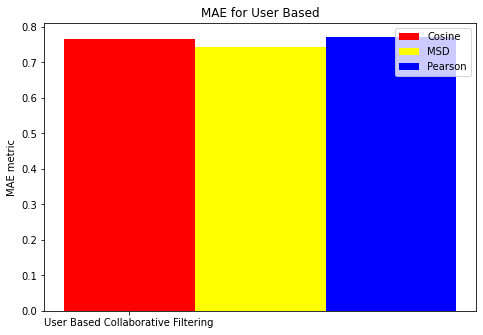

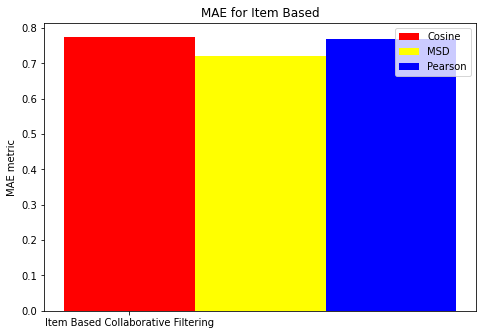

In [32]:
#MAE for User Based Collaborative Filtering
label = ['User Based Collaborative Filtering']
value = np.arange(len(label)) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("MAE for User Based")
ax.bar(value + 0.00, data_for_plot['mae']['cosine'][0], color = '#FF0000', width = 0.25)
ax.bar(value + 0.25, data_for_plot['mae']['msd'][0], color = '#FFFF00', width = 0.25)
ax.bar(value + 0.50, data_for_plot['mae']['pearson'][0], color = '#0000FF', width = 0.25)
plt.xticks(value, label)
plt.ylabel("MAE metric")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])


#MAE for Item Based Collaborative Filtering
label = ['Item Based Collaborative Filtering']
value = np.arange(len(label)) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("MAE for Item Based")
ax.bar(value + 0.00, data_for_plot['mae']['cosine'][1], color = '#FF0000', width = 0.25)
ax.bar(value + 0.25, data_for_plot['mae']['msd'][1], color = '#FFFF00', width = 0.25)
ax.bar(value + 0.50, data_for_plot['mae']['pearson'][1], color = '#0000FF', width = 0.25)
plt.xticks(value, label)
plt.ylabel("MAE metric")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()



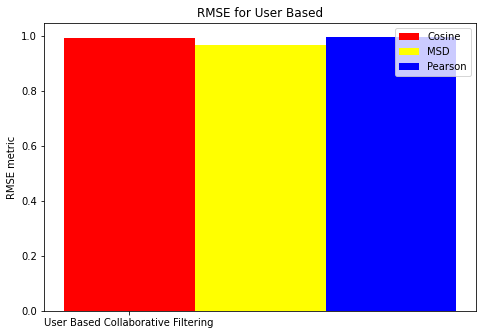

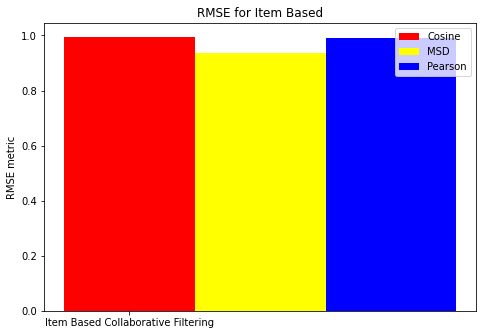

In [27]:
#RMSE for User Based Collaborative Filtering
label = ['User Based Collaborative Filtering']
value = np.arange(len(label)) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("RMSE for User Based")
ax.bar(value + 0.00, data_for_plot['rmse']['cosine'][0], color = '#FF0000', width = 0.25)
ax.bar(value + 0.25, data_for_plot['rmse']['msd'][0], color = '#FFFF00', width = 0.25)
ax.bar(value + 0.50, data_for_plot['rmse']['pearson'][0], color = '#0000FF', width = 0.25)
plt.xticks(value, label)
plt.ylabel("RMSE metric")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])


#RMSE for Item Based Collaborative Filtering
label = ['Item Based Collaborative Filtering']
value = np.arange(len(label)) 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("RMSE for Item Based")
ax.bar(value + 0.00, data_for_plot['rmse']['cosine'][1], color = '#FF0000', width = 0.25)
ax.bar(value + 0.25, data_for_plot['rmse']['msd'][1], color = '#FFFF00', width = 0.25)
ax.bar(value + 0.50, data_for_plot['rmse']['pearson'][1], color = '#0000FF', width = 0.25)
plt.xticks(value, label)
plt.ylabel("RMSE metric")
plt.yticks()
plt.legend(["Cosine", "MSD", "Pearson"])
plt.show()


In [20]:


ks = np.arange(1, 20, 1)
ub_mae = []
ub_rmse = []
for k in ks:     
    sim_options = {
    "user_based": True, 
    }    
    knn = KNNWithMeans(k, sim_options=sim_options)
    results = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_mae = results['test_mae'].mean()
    mean_rsme = results['test_rmse'].mean()
    ub_mae.append(mean_mae)
    ub_rmse.append(mean_rsme)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1563  1.1568  1.1388  1.1523  1.1557  1.1520  0.0068  
MAE (testset)     0.8911  0.8905  0.8797  0.8887  0.8932  0.8886  0.0047  
Fit time          0.15    0.20    0.19    0.19    0.21    0.19    0.02    
Test time         0.85    1.03    0.83    0.83    0.83    0.87    0.08    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

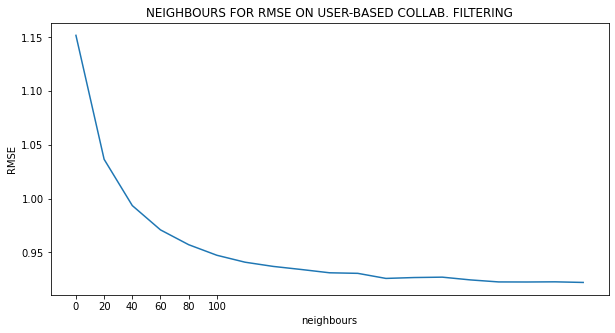

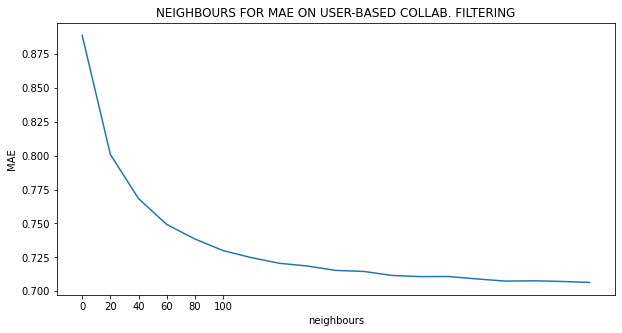

In [28]:
x = [1, 2, 3, 4, 5, 6]
labels = ['0', '20', '40', '60', '80', '100']
plt.figure(figsize=(10,5))
plt.plot(ks, ub_rmse)
plt.title('NEIGHBOURS FOR RMSE ON USER-BASED COLLAB. FILTERING')
plt.xlabel('neighbours')
plt.ylabel('RMSE')
plt.xticks(x, labels)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(ks, ub_mae)
plt.title('NEIGHBOURS FOR MAE ON USER-BASED COLLAB. FILTERING')
plt.xlabel('neighbours')
plt.ylabel('MAE')
plt.xticks(x, labels)
plt.show()

In [22]:
ib_mae = []
ib_rmse = []

for k in ks: 
    sim_options = {
    "user_based": False,  
    }
    
    knn = KNNWithMeans(k, sim_options=sim_options)
    scores = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    mean_mae = scores['test_mae'].mean()
    mean_rsme = scores['test_rmse'].mean()
    
    ib_mae.append(mean_mae)
    ib_rmse.append(mean_rsme)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1802  1.1741  1.1691  1.1781  1.1780  1.1759  0.0039  
MAE (testset)     0.9010  0.9005  0.8976  0.8984  0.9041  0.9003  0.0023  
Fit time          4.30    4.07    3.94    4.18    3.99    4.09    0.13    
Test time         4.69    4.48    4.55    5.37    5.62    4.94    0.46    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

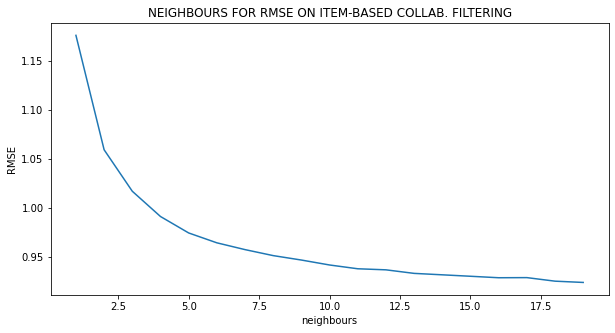

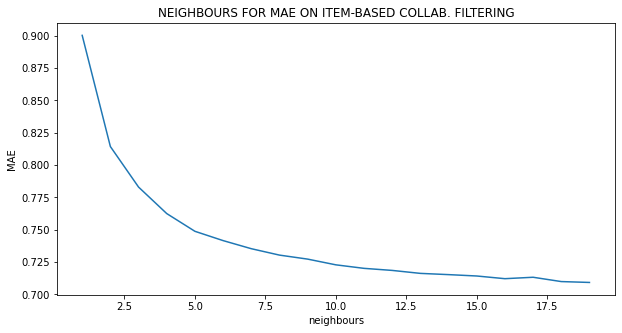

In [29]:
plt.figure(figsize=(10,5))
plt.plot(ks, ib_rmse)
plt.title('NEIGHBOURS FOR RMSE ON ITEM-BASED COLLAB. FILTERING')
plt.xlabel('neighbours')
plt.ylabel('RMSE')

plt.show()

plt.figure(figsize=(10,5))
plt.plot(ks, ib_mae)
plt.title('NEIGHBOURS FOR MAE ON ITEM-BASED COLLAB. FILTERING')
plt.xlabel('neighbours')
plt.ylabel('MAE')


plt.show()

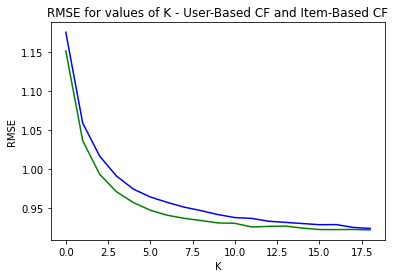

In [30]:
plt.plot(ub_rmse, color = 'green')
plt.plot(ib_rmse, color='blue')
plt.xlabel("K")
plt.ylabel("RMSE")
plt.title("RMSE for values of K - User-Based CF and Item-Based CF")
plt.show()

In [31]:
print('\nUSER-BASED COLLAB. FILTERING - RMSE')
print('Best K: ', ks[np.argmin(ub_rmse)])
print('Best K RMSE: ', np.min(ub_rmse))

print('\nITEM-BASED COLLAB. FILTERING - RMSE')
print('Best K: ', ks[np.argmin(ib_rmse)])
print('Best K RMSE: ', np.min(ib_rmse))


USER-BASED COLLAB. FILTERING - RMSE
Best K:  19
Best K RMSE:  0.9219560765856872

ITEM-BASED COLLAB. FILTERING - RMSE
Best K:  19
Best K RMSE:  0.9238511228496188
